In [1]:
import pandas as pd

C:\Users\hamza\AppData\Local\Temp\ipykernel_12076\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# df = pd.read_csv('players_blegium_japan.csv')
# df = pd.read_csv('fifaplayers.csv')
# df = pd.read_csv('timestampplayers.csv')
# df = pd.read_csv('playersNball.csv')
df = pd.read_csv('beforeplayersNball.csv')
df

,id,teamId,frame,x,y,ball_posession,timestamp,ball_x,ball_y
0,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,29,-1,0,0.00,29,81
1,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,46,55,0,0.00,29,81
2,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,51,49,0,0.00,29,81
3,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,54,75,0,0.00,29,81
4,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,32,37,0,0.00,29,81
...,...,...,...,...,...,...,...,...,...
33049,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,1660,20,60,0,24.14,12,49
33050,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Green,1660,23,49,0,24.14,12,49
33051,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,1660,35,40,0,24.14,12,49
33052,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,1660,18,55,0,24.14,12,49


In [136]:
points = []
start_x = None
start_y = None
end_y = None
end_x = None

for index, row in df.iterrows():
    if row['ball_posession'] == 1:  # Check if ball possession is 1
        if start_x is None:  # Starting point
            start_x = row['x']
            start_y = row['y']
            points.append((start_x, start_y, row['teamId'], row['timestamp']))  # Append starting point
            if end_x and end_y is not None:
                points.append((end_x, end_y, row['teamId'], row['timestamp']))      # Append ending point
        else:  # Ending point
            end_x = row['x']
            end_y = row['y']
            start_x = None
            start_y = None

print("Points:", points)
len(points)

Points: [(30, 81, 'Red', 0.0), (29, 80, 'Red', 0.03), (30, 80, 'Red', 0.03), (29, 79, 'Blue', 0.07), (29, 80, 'Blue', 0.07), (29, 80, 'Blue', 0.1), (29, 80, 'Blue', 0.1), (28, 80, 'Blue', 0.13), (28, 80, 'Blue', 0.13), (27, 80, 'Blue', 0.17), (28, 80, 'Blue', 0.17), (23, 79, 'Blue', 0.25), (26, 80, 'Blue', 0.25), (22, 79, 'Blue', 0.28), (23, 79, 'Blue', 0.28), (22, 79, 'Red', 0.32), (22, 79, 'Red', 0.32), (22, 79, 'Blue', 0.35), (22, 79, 'Blue', 0.35), (23, 79, 'Blue', 0.38), (23, 79, 'Blue', 0.38), (23, 79, 'Blue', 0.42), (23, 79, 'Blue', 0.42), (22, 80, 'Red', 0.47), (23, 80, 'Red', 0.47), (22, 80, 'Red', 0.5), (22, 80, 'Red', 0.5), (22, 80, 'Red', 0.53), (22, 80, 'Red', 0.53), (22, 78, 'Blue', 0.57), (22, 80, 'Blue', 0.57), (22, 79, 'Red', 0.6), (22, 80, 'Red', 0.6), (22, 80, 'Red', 0.63), (22, 80, 'Red', 0.63), (22, 80, 'Red', 0.67), (22, 80, 'Red', 0.67), (22, 80, 'Blue', 0.7), (22, 80, 'Blue', 0.7), (22, 79, 'Blue', 0.73), (22, 80, 'Blue', 0.73), (22, 80, 'Blue', 0.75), (22, 79, 

721

In [137]:
import pandas as pd
# Initialize lists to store data for DataFrame
starting_points = []
ending_points = []
pass_completions = []
team=[]
ts=[]

# Iterate through the points list
for i in range(len(points) - 1):
    current_point = points[i]
    next_point = points[i + 1]

    # Extract coordinates and teamID
    current_coords = current_point[:2]
    next_coords = next_point[:2]
    team_id_current = current_point[2]
    team_id_next = next_point[2]

    # Determine pass completion
    if team_id_current == team_id_next:
        if current_coords == next_coords:
            pass_completions.append("no pass attempted")
            team.append(team_id_current)
        else:
            pass_completions.append("pass completed")
            team.append(team_id_current)
    else:
        pass_completions.append("pass incomplete")
        team.append(team_id_current)

    # Add starting and ending points to lists
    starting_points.append(current_coords)
    ending_points.append(next_coords)
    ts.append(current_point[3])

# Create DataFrame
df_fin = pd.DataFrame({
    "Starting_Point": starting_points,
    "Ending_Point": ending_points,
    "PassCompletion": pass_completions,
    "Team": team,
    "TS":ts
})

print(df_fin)


    Starting_Point Ending_Point     PassCompletion  Team     TS
0         (30, 81)     (29, 80)     pass completed   Red   0.00
1         (29, 80)     (30, 80)     pass completed   Red   0.03
2         (30, 80)     (29, 79)    pass incomplete   Red   0.03
3         (29, 79)     (29, 80)     pass completed  Blue   0.07
4         (29, 80)     (29, 80)  no pass attempted  Blue   0.07
..             ...          ...                ...   ...    ...
715       (33, 41)     (33, 45)     pass completed  Blue  21.81
716       (33, 45)     (30, 46)     pass completed  Blue  21.81
717       (30, 46)     (33, 41)     pass completed  Blue  22.32
718       (33, 41)     (29, 45)     pass completed  Blue  22.32
719       (29, 45)     (29, 46)     pass completed  Blue  22.52

[720 rows x 5 columns]


In [148]:
import numpy as np
 
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Threshold distance
threshold = 8

# Iterate through each row and apply distance threshold if PassCompletion is not "no pass attempted"
for index, row in df_fin.iterrows():
    if row['Team'] != 'Green':
        if row['PassCompletion'] != "no pass attempted":
            distance = euclidean_distance(row['Starting_Point'], row['Ending_Point'])
            if distance < threshold:
                # Remove row if distance is below threshold
                df_fin.drop(index, inplace=True)

print("DataFrame after removing rows with distance below threshold (except 'no pass attempted'):")
print(df_fin)

DataFrame after removing rows with distance below threshold (except 'no pass attempted'):
    Starting_Point Ending_Point     PassCompletion  Team     TS   TypeOfPass
4         (29, 80)     (29, 80)  no pass attempted  Blue   0.07  Normal Pass
5         (29, 80)     (29, 80)  no pass attempted  Blue   0.10  Normal Pass
7         (28, 80)     (28, 80)  no pass attempted  Blue   0.13  Normal Pass
15        (22, 79)     (22, 79)  no pass attempted   Red   0.32  Normal Pass
17        (22, 79)     (22, 79)  no pass attempted  Blue   0.35  Normal Pass
..             ...          ...                ...   ...    ...          ...
704       (28, 57)     (28, 57)  no pass attempted  Blue  21.02  Normal Pass
705       (28, 57)     (28, 57)  no pass attempted  Blue  21.05  Normal Pass
708       (29, 54)     (35, 41)     pass completed  Blue  21.09  Normal Pass
709       (35, 41)     (27, 57)     pass completed  Blue  21.60  Normal Pass
710       (27, 57)     (34, 44)     pass completed  Blue  21.60

In [149]:
#find maxium ycoordinate in both starting and ending point in df_fin
max_y = max(df_fin['Starting_Point'].apply(lambda x: x[1]).max(), df_fin['Ending_Point'].apply(lambda x: x[1]).max())
max_y
over= max_y-80

In [150]:
df_fin['Starting_Point'].apply(lambda x: x[0]).min()

22

In [151]:
# Coordinates of the goal
gc_left = (0, 40)
gc_right = (120, 0)

# Define the starting and ending rectangles
sixyard_left = [(0, 18), (18, 18), (18, 62), (0, 62)]
pen_left = [(0, 30), (5, 30), (5, 50), (0, 50)]
#right
sixyard_right = [(115, 30), (120, 30), (115, 50), (120, 50)]
pen_right=[(102, 18), (120, 18), (120, 62), (102, 62)]

def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Calculate progressive pass
def is_progressive_pass(start, end, goal, threshold=0.25):
    start_distance = euclidean_distance(start, goal)
    end_distance = euclidean_distance(end, goal)
    return end_distance < start_distance * (1 - threshold)

def point_in_rectangle(point, rect):
    x, y = point
    x_coords, y_coords = zip(*rect)
    return min(x_coords) <= x <= max(x_coords) and min(y_coords) <= y <= max(y_coords)

def determine_pass_type(row):
    if row['PassCompletion'] != 'no pass attempted': #chekc how many passes attempted were progressive, completed or incomplete, effective
        if row['Team'] == 'Blue':
            goal_coordinates = gc_left
            starting_rect=pen_left
            ending_rect=sixyard_left
        else:
            goal_coordinates = gc_right
            starting_rect=pen_left
            ending_rect=sixyard_right
        if point_in_rectangle(row['Starting_Point'], starting_rect) and point_in_rectangle(row['Ending_Point'], ending_rect):
            return 'cutback'
        if is_progressive_pass(row['Starting_Point'], row['Ending_Point'], goal_coordinates):
            return 'progressive pass'
        if not point_in_rectangle(row['Starting_Point'], ending_rect) and point_in_rectangle(row['Ending_Point'], ending_rect):
            return 'cross'
        if euclidean_distance(row['Starting_Point'], row['Ending_Point']) > 32:  # 35 yards = ~32 meters
            return 'long ball'
    return 'Normal Pass'

df_fin['TypeOfPass'] = df_fin.apply(determine_pass_type, axis=1)

# Display the DataFrame
print(df_fin)

    Starting_Point Ending_Point     PassCompletion  Team     TS   TypeOfPass
4         (29, 80)     (29, 80)  no pass attempted  Blue   0.07  Normal Pass
5         (29, 80)     (29, 80)  no pass attempted  Blue   0.10  Normal Pass
7         (28, 80)     (28, 80)  no pass attempted  Blue   0.13  Normal Pass
15        (22, 79)     (22, 79)  no pass attempted   Red   0.32  Normal Pass
17        (22, 79)     (22, 79)  no pass attempted  Blue   0.35  Normal Pass
..             ...          ...                ...   ...    ...          ...
704       (28, 57)     (28, 57)  no pass attempted  Blue  21.02  Normal Pass
705       (28, 57)     (28, 57)  no pass attempted  Blue  21.05  Normal Pass
708       (29, 54)     (35, 41)     pass completed  Blue  21.09  Normal Pass
709       (35, 41)     (27, 57)     pass completed  Blue  21.60  Normal Pass
710       (27, 57)     (34, 44)     pass completed  Blue  21.60  Normal Pass

[387 rows x 6 columns]


In [152]:
#df fin to sql

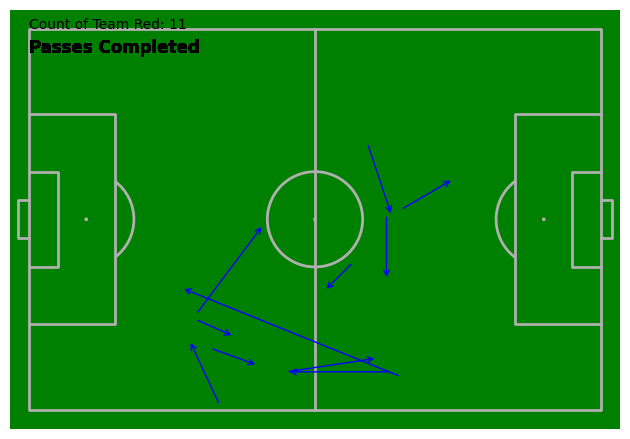

In [156]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer import Pitch

# Filter out passes where the starting point of the current pass is the same as the ending point of the previous pass
filtered_rows = []
previous_end_point = None

for index, row in df_fin.iterrows():
    if row['PassCompletion'] == "pass completed":
        if previous_end_point is None or row['Starting_Point'] != previous_end_point:
            filtered_rows.append(row)
        previous_end_point = row['Ending_Point']

filtered_df = pd.DataFrame(filtered_rows)

# Assuming you have already created a plot named 'ax'
pitch = Pitch(pitch_color='green', goal_type='box', goal_alpha=1)
fig, ax = pitch.draw()

# Assigning colors based on PassCompletion
pass_completion_colors = {
    "no pass attempted": "blue",
    "pass completed": "yellow",
    "pass incomplete": "red"
}

c=0
# Iterate through the DataFrame to plot arrows between consecutive points
for index, row in filtered_df.iterrows():
    if row['PassCompletion'] == "pass completed":
        if row['Team'] == 'Red':
            x_start, y_start = row['Starting_Point']     # Starting point
            x_end, y_end = row['Ending_Point']     # Ending point
            pass_completion = row['PassCompletion']  # Pass completion status
            # Plotting arrows and scatter points
            y_start= y_start-over
            y_end= y_end-over
            ax.annotate("", xy=(x_start, y_start), xytext=(x_end, y_end),
                    arrowprops=dict(arrowstyle='<-', color='blue'), alpha=0.5,
                    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1))
            ax.text(0, 5, "Passes Completed", fontsize=12, color='black', weight='bold')
            c=c+1

ax.text(0, 0, f"Count of Team Red: {c}", fontsize=10, color='black')

plt.show()  # Show the plot


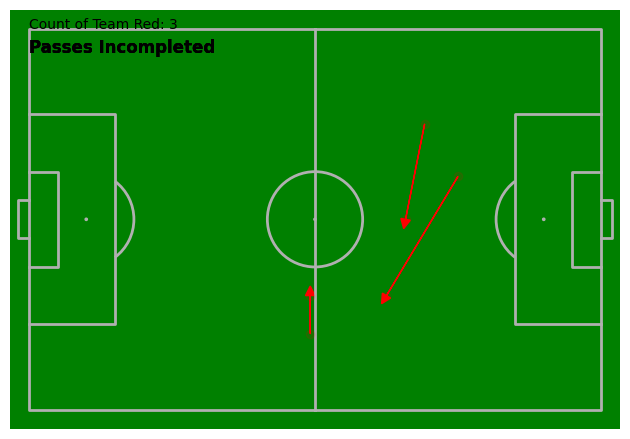

In [155]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer import Pitch

# Assuming you have already created a plot named 'ax'
pitch = Pitch(pitch_color='green', goal_type='box', goal_alpha=1)
fig, ax = pitch.draw()

# Assigning c
# olors based on PassCompletion
pass_completion_colors = {
    "no pass attempted": "blue",
    "pass completed": "yellow",
    "pass incomplete": "red"
}
c=0
# Iterate through the DataFrame to plot arrows between consecutive points
for index, row in df_fin.iterrows():
    if row['Team'] == 'Red':
        if row['PassCompletion'] == "pass incomplete":
            x_start, y_start = row['Starting_Point']     # Starting point
            x_end, y_end = row['Ending_Point']     # Ending point
            pass_completion = row['PassCompletion']  # Pass completion status
            y_start= y_start-over
            y_end= y_end-over
            # Plotting arrows and scatter points
            ax.arrow(x_start, y_start, x_end - x_start, y_end - y_start,
                    color=pass_completion_colors[pass_completion], alpha=1,
                    head_width=2, head_length=2, zorder=0)  # Adjust head width and length as needed
            ax.scatter(x_start, y_start, color=pass_completion_colors[pass_completion], zorder=1, alpha=0.1)
            ax.scatter(x_end, y_end, color=pass_completion_colors[pass_completion], zorder=1, alpha=0.1)
            # Add text annotation for "Passes Completed" heading and count of passes completed
            ax.text(0, 5, "Passes Incompleted", fontsize=12, color='black', weight='bold')
            c=c+1

ax.text(0, 0, f"Count of Team Red: {c}", fontsize=10, color='black')

plt.show()  # Show the plot


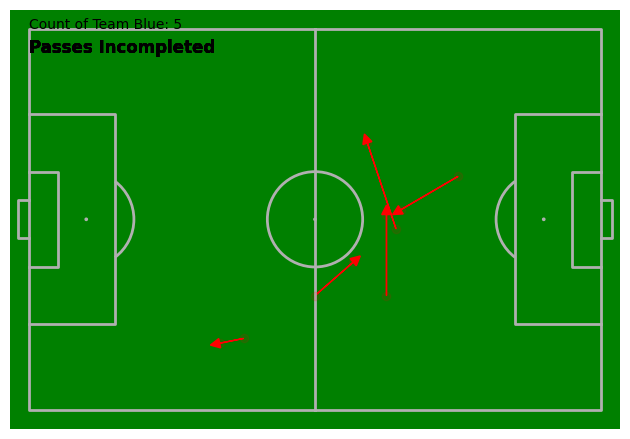

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer import Pitch

# Assuming you have already created a plot named 'ax'
pitch = Pitch(pitch_color='green', goal_type='box', goal_alpha=1)
fig, ax = pitch.draw()

# Assigning c
# olors based on PassCompletion
pass_completion_colors = {
    "no pass attempted": "blue",
    "pass completed": "yellow",
    "pass incomplete": "red"
}
c=0
# Iterate through the DataFrame to plot arrows between consecutive points
for index, row in df_fin.iterrows():
    if row['Team'] == 'Blue':
        if row['PassCompletion'] == "pass incomplete":
            x_start, y_start = row['Starting_Point']     # Starting point
            x_end, y_end = row['Ending_Point']     # Ending point
            pass_completion = row['PassCompletion']  # Pass completion status
            y_start= y_start-over
            y_end= y_end-over
            # Plotting arrows and scatter points
            ax.arrow(x_start, y_start, x_end - x_start, y_end - y_start,
                    color=pass_completion_colors[pass_completion], alpha=1,
                    head_width=2, head_length=2, zorder=0)  # Adjust head width and length as needed
            ax.scatter(x_start, y_start, color=pass_completion_colors[pass_completion], zorder=1, alpha=0.1)
            ax.scatter(x_end, y_end, color=pass_completion_colors[pass_completion], zorder=1, alpha=0.1)
            # Add text annotation for "Passes Completed" heading and count of passes completed
            ax.text(0, 5, "Passes Incompleted", fontsize=12, color='black', weight='bold')
            c=c+1

ax.text(0, 0, f"Count of Team Blue: {c}", fontsize=10, color='black')

plt.show()  # Show the plot


In [24]:
df_fin

,Starting_Point,Ending_Point,PassCompletion,Team,TypeOfPass
0,"(30, 81)","(29, 80)",pass completed,Red,Normal Pass
1,"(29, 80)","(30, 80)",pass completed,Red,Normal Pass
2,"(30, 80)","(29, 79)",pass incomplete,Red,Normal Pass
4,"(29, 80)","(29, 80)",no pass attempted,Blue,Normal Pass
5,"(29, 80)","(29, 80)",no pass attempted,Blue,Normal Pass
...,...,...,...,...,...
704,"(28, 57)","(28, 57)",no pass attempted,Blue,Normal Pass
705,"(28, 57)","(28, 57)",no pass attempted,Blue,Normal Pass
708,"(29, 54)","(35, 41)",pass completed,Blue,Normal Pass
709,"(35, 41)","(27, 57)",pass completed,Blue,Normal Pass


In [51]:
# install dependencies
import sys
!{sys.executable} -m pip install cloud-sql-python-connector["pymysql"] SQLAlchemy==2.0.7

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask-appbuilder 4.4.1 requires SQLAlchemy<1.5, but you have sqlalchemy 2.0.7 which is incompatible.
apache-airflow 2.9.1 requires sqlalchemy<2.0,>=1.4.36, but you have sqlalchemy 2.0.7 which is incompatible.
marshmallow-sqlalchemy 0.28.2 requires SQLAlchemy<2.0,>=1.3.0, but you have sqlalchemy 2.0.7 which is incompatible.



   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
    --------------------------------------- 0.0/2.0 MB 660.6 kB/s eta 0:00:03
    --------------------------------------- 0.0/2.0 MB 393.8 kB/s eta 0:00:05
    --------------------------------------- 0.0/2.0 MB 393.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/2.0 MB 722.1 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.0 MB 654.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.0 MB 692.9 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/2.0 MB 893.0 kB/s eta 0:00:02
   --------- ------------------------------ 0.5/2.0 MB 1.1 MB/s eta 0:00:02
   -------------- ------------------------- 0.7/2.0 MB 1.5 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.0 MB 1.8 MB/s eta 0:00:01
   -------------------- ------------------- 1.0/2.0 MB 1.8 MB/s eta 0:00:01
   ----------------------- ---------------- 1.2/2.0 MB 1.9 MB/s eta 0:00:01
   -

In [58]:
import requests 
import datetime
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

try:
    load_dotenv()
    username = "dbuser-hamza"
    password = "UrVc&2Nz56"
    server ="iba-fyp-421811"
    database = "FAN"
    driver = "ODBC Driver 17 for SQL Server"


    conn_str = f'mysql+pymysql://{username}:{password}@{server}/{database}'

    engine = create_engine(conn_str)
    df_fin.to_sql(name='Passing',con=engine,if_exists='replace')
    msg = True
    
except Exception as e:
            print(f"Error occurred while writing to CSV: {e}")
            msg = False
        

Error occurred while writing to CSV: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'iba-fyp-421811' ([Errno 11001] getaddrinfo failed)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [12]:
import sqlalchemy as sa
from google.cloud.sql.connector import Connector
import pandas as pd
import traceback

DB_USER = 'dbuser-hamza'
DB_PASS = 'UrVc&2Nz56'
DB_HOST = '34.134.35.100'
DB_NAME = 'FAN'
CONNECTION_NAME = 'iba-fyp-421811:us-central1:fyp-iba-db'

def get_cloud_conn():
    connector = Connector()
    conn = connector.connect(
        CONNECTION_NAME,
        'pymysql',
        user=DB_USER,
        password=DB_PASS,
        db=DB_NAME
    )
    return conn

def get_engine() -> sa.Engine:
    engine = sa.create_engine(
        "mysql+pymysql://",
        creator=get_cloud_conn,
        echo=True
    )
    return engine

def save_list_to_sql(data: list, engine: sa.Engine) -> bool:
    df = df_fin
    try:
        df.to_sql(
        'Passing',
        con=engine,
        if_exists='replace'
        )
    except Exception as e:
        print(traceback.format_exc())
        print('Failed whlie saving data to database')

# Tests

# def test_save_list_to_sql():
#     data_list = [
#         {"A": 1, "B": 2}
#     ]    
#     engine: sa.Engine = get_engine()
#     save_list_to_sql(data_list, engine)
# test_save_list_to_sql()
engine: sa.Engine = get_engine()
save_list_to_sql(df_fin, engine)


Traceback (most recent call last):
  File "C:\Users\hamza\AppData\Local\Temp\ipykernel_23992\23623836.py", line 34, in save_list_to_sql
    df.to_sql(
  File "C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\util\_decorators.py", line 333, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\generic.py", line 3081, in to_sql
    return sql.to_sql(
  File "C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py", line 841, in to_sql
    with pandasSQL_builder(con, schema=schema, need_transaction=True) as pandas_sql:
  File "C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310